In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
yelp=pd.read_csv('yelp.csv')


In [3]:
yelp.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [5]:
yelp[['text','stars']]

,text,stars
0,My wife took me here on my birthday for breakf...,5
1,I have no idea why some people give bad review...,5
2,love the gyro plate. Rice is so good and I als...,4
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5
4,General Manager Scott Petello is a good egg!!!...,5
...,...,...
9995,First visit...Had lunch here today - used my G...,3
9996,Should be called house of deliciousness!\n\nI ...,4
9997,I recently visited Olive and Ivy for business ...,4
9998,My nephew just moved to Scottsdale recently so...,2


In [6]:
yelp['length']=yelp['text'].apply(len)


In [7]:
yelp[['text','stars','length']]

,text,stars,length
0,My wife took me here on my birthday for breakf...,5,889
1,I have no idea why some people give bad review...,5,1345
2,love the gyro plate. Rice is so good and I als...,4,76
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",5,419
4,General Manager Scott Petello is a good egg!!!...,5,469
...,...,...,...
9995,First visit...Had lunch here today - used my G...,3,668
9996,Should be called house of deliciousness!\n\nI ...,4,881
9997,I recently visited Olive and Ivy for business ...,4,1425
9998,My nephew just moved to Scottsdale recently so...,2,880


In [8]:
yelp[['text','stars','length']].describe()

,stars,length
count,10000.000000,10000.000000
mean,3.777500,710.738700
std,1.214636,617.399827
min,1.000000,1.000000
25%,3.000000,294.000000
50%,4.000000,541.500000
75%,5.000000,930.000000
max,5.000000,4997.000000


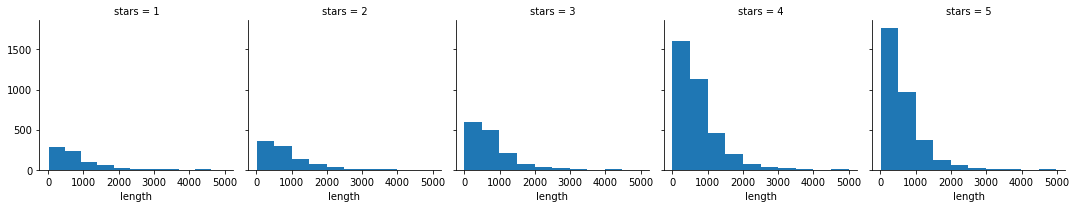

In [9]:
g=sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'length')

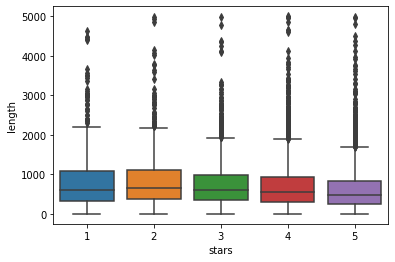

In [10]:
sns.boxplot(x='stars',y='length',data=yelp)

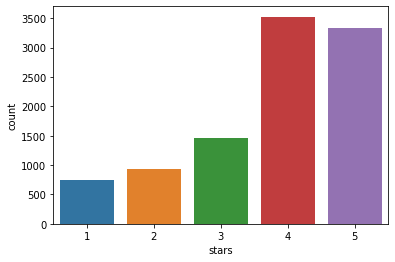

In [12]:
sns.countplot(x='stars',data=yelp)

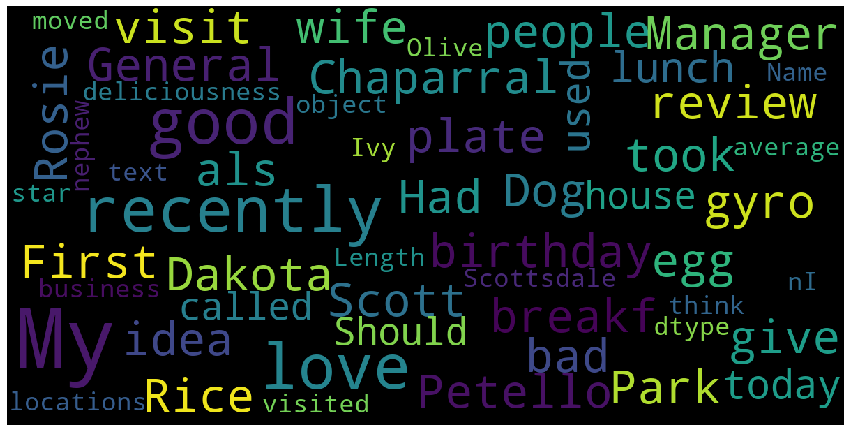

In [79]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
  

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(yelp['text'])


In [17]:
yelp_category=yelp[(yelp['stars']==1) | (yelp['stars']==5)]

In [19]:
yelp_category.head(5)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565


In [23]:
X=yelp_category['text']
y=yelp_category['stars']


In [24]:
from sklearn.model_selection import train_test_split

In [32]:
text_train,text_test,stars_train,stars_test=train_test_split(X,y,test_size =0.3)

In [33]:
text_train.shape

(2860,)

In [80]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

In [87]:
pipeline=Pipeline([('Count_vector',CountVectorizer()),
                   ('Model',MultinomialNB())
                  ])

In [88]:
pipeline.fit(text_train,stars_train)

Pipeline(memory=None,
         steps=[('Count_vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('Model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [89]:
predictor=pipeline.predict(text_test)

In [90]:
predictor

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [91]:
from sklearn.metrics import classification_report

In [92]:
print(classification_report(stars_test,predictor))

              precision    recall  f1-score   support

           1       0.89      0.67      0.77       229
           5       0.93      0.98      0.95       997

    accuracy                           0.92      1226
   macro avg       0.91      0.83      0.86      1226
weighted avg       0.92      0.92      0.92      1226



In [93]:
pipeline=Pipeline([('Count_vector',CountVectorizer()),
                   ('Model',RandomForestClassifier())
                  ])

In [94]:
pipeline.fit(text_train,stars_train)

C:\Users\adith\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Pipeline(memory=None,
         steps=[('Count_vector',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabu...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0

In [95]:
predictor=pipeline.predict(text_test)

predictor

array([5, 5, 5, ..., 5, 5, 5], dtype=int64)

In [96]:
print(classification_report(stars_test,predictor))

              precision    recall  f1-score   support

           1       0.77      0.38      0.50       229
           5       0.87      0.97      0.92       997

    accuracy                           0.86      1226
   macro avg       0.82      0.67      0.71      1226
weighted avg       0.85      0.86      0.84      1226

